# BigMart Sales Analysis and Prediction

This notebook demonstrates the steps for data preprocessing, visualization, model training, and evaluation using the BigMart dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(data):
    # Copy the data to avoid modifying the original DataFrame
    data = data.copy()

    # Handle missing values
    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
    data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

    # Feature engineering
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
        'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
    })
    data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['New_Item_Type'] = data['New_Item_Type'].map({
        'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
    })

    # Drop unnecessary columns
    data = data.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
    data['Outlet_Size'] = label_encoder.fit_transform(data['Outlet_Size'])

    # One-hot encoding for other categorical variables
    data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

    # Scale numerical features
    numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data


In [3]:
# Define data visualization functions
def plot_target_distribution(data, target_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[target_column], kde=True)
    plt.title(f'Distribution of {target_column}')
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(data):
    # Copy the data to avoid modifying the original DataFrame
    data = data.copy()

    # Handle missing values
    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
    data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

    # Feature engineering
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
        'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
    })
    data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['New_Item_Type'] = data['New_Item_Type'].map({
        'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
    })

    # Drop unnecessary columns
    data = data.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
    data['Outlet_Size'] = label_encoder.fit_transform(data['Outlet_Size'])
    data['Outlet_Location_Type'] = label_encoder.fit_transform(data['Outlet_Location_Type'])
    data['New_Item_Type'] = label_encoder.fit_transform(data['New_Item_Type'])

    # One-hot encoding for other categorical variables
    data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

    # Scale numerical features
    numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data


In [16]:
# Load the data
train_data = pd.read_csv('../data/raw/Train.csv')

# Apply the data preprocessing function
processed_train_data = preprocess_data(train_data)

# Display the first few rows of the processed data
print(processed_train_data.head())


   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0    -0.841872                 0        -0.970732  1.747454   
1    -1.641706                 1        -0.908111 -1.489023   
2     1.098554                 0        -0.956917  0.010040   
3     1.500838                 1        -1.281758  0.660050   
4    -0.929428                 0        -1.281758 -1.399220   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1                     0   
3                       1998            1                     2   
4                       1987            0                     2   

   Item_Outlet_Sales  New_Item_Type  Item_Type_Breads  ...  \
0          3735.1380              1             False  ...   
1           443.4228              0             False  ...   
2          2097.2700            

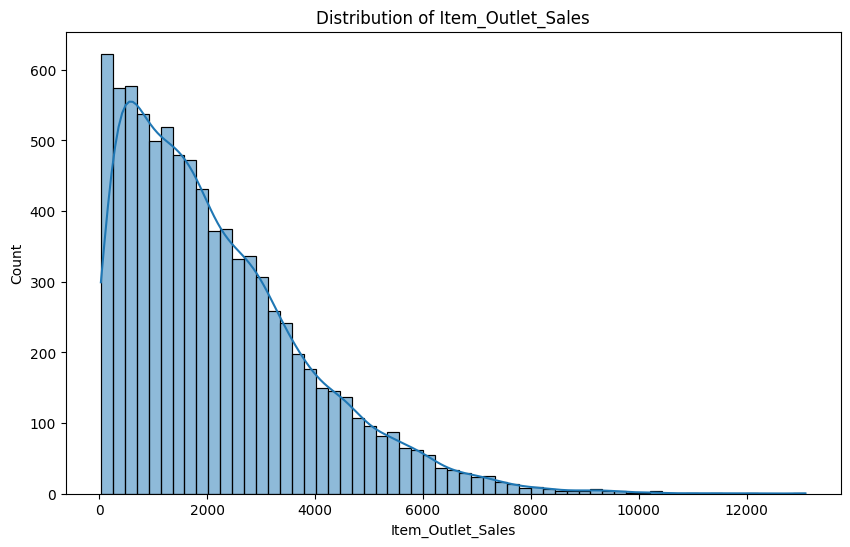

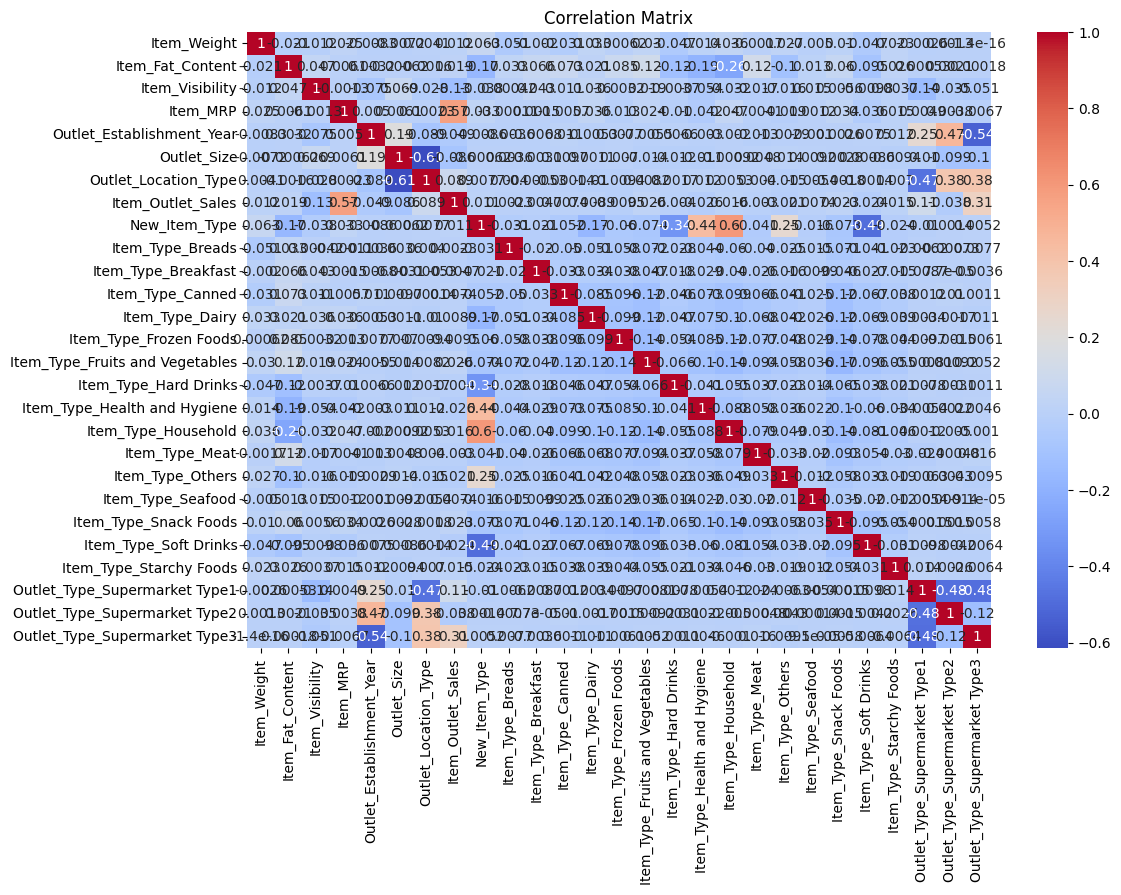

In [17]:
# Visualize the processed data
target_column = 'Item_Outlet_Sales'
plot_target_distribution(processed_train_data, target_column)
plot_correlation_matrix(processed_train_data)


In [18]:
# Train and evaluate the model
trained_model = train_and_evaluate_model(processed_train_data, target_column)


Mean Squared Error: 1211577.728283131
